In [1]:
import datetime as dt
import os, sys
import netCDF4 as nc
import matplotlib as mpl
import numpy as np
import numpy.ma as ma
from scipy.spatial import distance
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib import cm
import matplotlib.colors as mpl_colors
from matplotlib import rc
from mpl_toolkits.axes_grid1 import make_axes_locatable


from salishsea_tools import geo_tools, viz_tools

get_ipython().magic('matplotlib inline')

In [2]:
#Parameters

cmap = plt.get_cmap('nipy_spectral')
cmap.set_bad('burlywood')

H = 24 #One day in hours

#Ariane parameters
tunit= 3600

outint = 20 * 60 # 20 min in seconds

pph = int(tunit / outint) #points per hour

lmt = 1896 #points per particle


#RUN parameters

nday= 100

basedir = "/ocean/gsgarbi/analysis-giorgio/time_series/results2016/"

plotsdir = "/ocean/gsgarbi/analysis-giorgio/time_series/results2016/plots"


position = nday * pph * H # d * num/h * h/d = num

In [3]:
#function to get points from an indiviual month

def get_pts(direct):
    
    points = []
    
    particle = 1 #start particle counter
    
    start = dt.datetime.now()
    print ("start {}: ".format(direct), start)


    with open(basedir + direct + "/traj.txt") as file:

        for i, line in enumerate(file):

            line = line.strip('\n').split()

            line = [float(k) for k in line]


            if line[0] == particle:
                index = i + position
                particle += 1

            if i == index:
                points.append (line)
                
        print ("time: ", dt.datetime.now() - start)
                
                
    return points

In [4]:
# # test cell

# year0 = year1 = year2 = [] #for each depth

# jan = get_pts("/ocean/gsgarbi/analysis-giorgio/time_series/results2016/20160101_20160131_427d/")

# feb = get_pts("/ocean/gsgarbi/analysis-giorgio/time_series/results2016/20160201_20160229_401d/")


# year0 = jan[0::3] + feb[0::3]
# year1 = jan[1::3] + feb[1::3]
# year2 = jan[2::3] + feb[2::3]



In [5]:
# Get points for the year - this process should take about 42min for 12 months (3.5min per month)

path = "/ocean/gsgarbi/analysis-giorgio/time_series/results2016/"

dirs = os.listdir( path )

dirs.sort()


    


In [16]:
def plot(points, title = 'title', picname = "noname"):
    
    Iona = (-123.30898284912109, 49.187351226806641)
    S15 = (-123.3114, 49.130412)
    S16 = (-123.317415, 49.1214)
    xl=(-126.2,-122.2)
    yl=(47.1,51)



    #prepare plot and constants
    plt.clf()
    start = dt.datetime.now()
    print ("start: ", start)
#     np.shape(points)
    mesh = nc.Dataset("/ocean/gsgarbi/mesh_mask_downbyone2.nc")
    tmask=np.copy(mesh.variables['tmask'])
    mesh.close()
    fb=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/bathy_downonegrid2.nc')
    nav_lon=np.copy(fb.variables['nav_lon'])
    nav_lat=np.copy(fb.variables['nav_lat'])
    fb.close()
    
    lonlim=[np.min(nav_lon),np.max(nav_lon)]
    latlim=[np.min(nav_lat),np.max(nav_lat)]


    griddata=0.0*tmask[0,0,:,:]
    griddata.shape
#     np.shape(points)[0]

    griddata, iedges, jedges = np.histogram2d(points[:,1],points[:,2],bins=[100,200],range=[lonlim,latlim])


    Jedges,Iedges=np.meshgrid(jedges,iedges)
    

    fig, axs = plt.subplots(1,1,figsize=(9,8))
    mesh0 = axs.pcolormesh(Iedges,Jedges,griddata,cmap=cmap)
    mesh0.set_clim(vmin = 0, vmax = 40)
    axs.set_xlim(xl)
    axs.set_ylim(yl)
    pos=axs.get_position()
    pos2=(pos.bounds[0],pos.bounds[1],pos.bounds[2]-.05,pos.bounds[3])
    axs.set_position(pos2)
    axs2 = plt.axes(pos2)
    viz_tools.set_aspect(axs,coords='map')
    mesh1=axs2.pcolormesh(nav_lon,nav_lat,np.ma.masked_where(tmask[0,0,:,:]==1,tmask[0,0,:,:]),cmap='YlOrRd')
    axs2.set_xlim(xl)
    axs2.set_ylim(yl)
    axs2.patch.set_alpha(0)
    viz_tools.set_aspect(axs2,coords='map')
    axsCB=plt.axes((pos2[0]+pos2[3],pos2[1],.02,pos2[3]))
    cbar = fig.colorbar(mesh0,cax=axsCB)
    cbar.set_label ("Counts")
    
    axs.set_title( title + "\n Total of trajectories: {}".format( int(np.sum(griddata)) ) )
    
    el = Ellipse((2, -1), 0.5, 0.5)

    axs2.annotate(
            "IONA",
            xy=(Iona[0], Iona[1]), xytext=(50, 10),
            textcoords='offset points', ha='left', va='bottom', color = (0.937, 0.439, 0.043),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                                      fc=(1,1,1), ec=(1., .5, .5),
                                      patchA=None,
                                      patchB=el,
                                      relpos=(0.2, 0.8),
                                      connectionstyle="arc3,rad=-0.1"))

    
    plt.savefig(picname, transparent = true)
    


In [7]:
dirs.sort()
winter = []
fall = []
summer = []
spring = []

In [8]:
for file in dirs[1:4]:
    month = get_pts(file)
    winter += month

start 20160201_20160229_401d:  2017-04-21 12:02:38.762339
time:  0:02:00.808005
start 20160301_20160331_355d:  2017-04-21 12:04:39.571391
time:  0:01:51.976310
start 20160401_20160430_325d:  2017-04-21 12:06:31.548549
time:  0:01:38.947746


In [9]:
for file in dirs[4:7]:
    month = get_pts(file)
    spring += month

start 20160501_20160531_294d:  2017-04-21 12:08:10.501357
time:  0:01:33.472287
start 20160601_20160630_264d:  2017-04-21 12:09:43.974419
time:  0:01:20.462867
start 20160701_20160731_252d:  2017-04-21 12:11:04.438439
time:  0:01:18.763626


In [10]:
for file in dirs[7:10]:
    month = get_pts(file)
    summer += month

start 20160801_20160831_217d:  2017-04-21 12:12:23.207787
time:  0:01:07.840479
start 20160901_20160930_172d:  2017-04-21 12:13:31.199367
time:  0:00:51.643449
start 20161001_20161031_141d:  2017-04-21 12:14:22.843833
time:  0:00:43.748917


In [11]:
fdirs = dirs[10:13]
for direct in fdirs:
    mon = get_pts(direct)
    fall += mon

start 20161101_20161130_111d:  2017-04-21 12:15:06.862727
time:  0:00:33.942209
start 20161201_20161231_95d:  2017-04-21 12:15:40.805641
time:  0:00:29.474388
start 20170101_20170131_77d:  2017-04-21 12:16:10.281042
time:  0:00:24.226876


start:  2017-04-21 12:16:34.762831


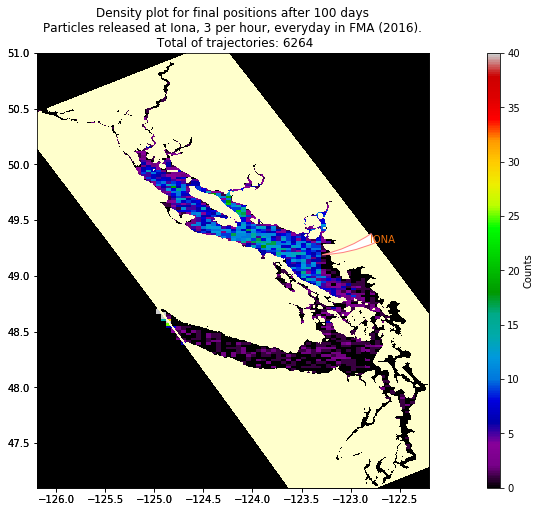

In [12]:
points = np.array(winter) #back to original name. convert to np.array

season = 'FMA'

title = (
    "Density plot for final positions after {} days\n"
    "Particles released at Iona, 3 per hour, everyday in {} (2016).".format(nday, season)
)

picname = "/ocean/gsgarbi/analysis-giorgio/2017apr20_presentation/{}d_{}".format(nday, season)

plot (points, title, picname)

start:  2017-04-21 12:16:36.351262


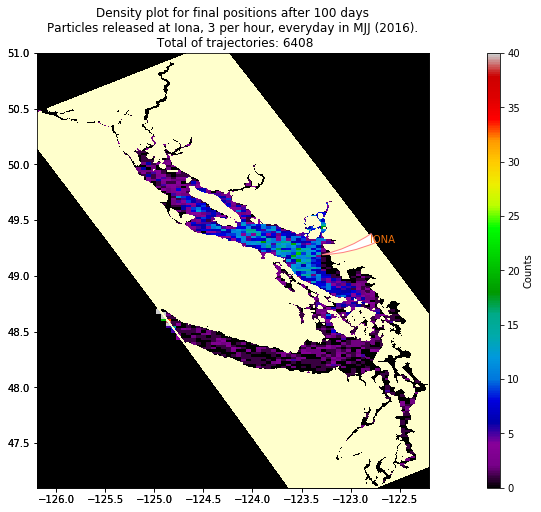

In [13]:
points = np.array(spring) #back to original name. convert to np.array


season = 'MJJ'
title = (
    "Density plot for final positions after {} days\n"
    "Particles released at Iona, 3 per hour, everyday in {} (2016).".format(nday, season)
)

picname = "/ocean/gsgarbi/analysis-giorgio/2017apr20_presentation/{}d_{}".format(nday, season)

plot (points, title, picname)



start:  2017-04-21 12:16:37.467788


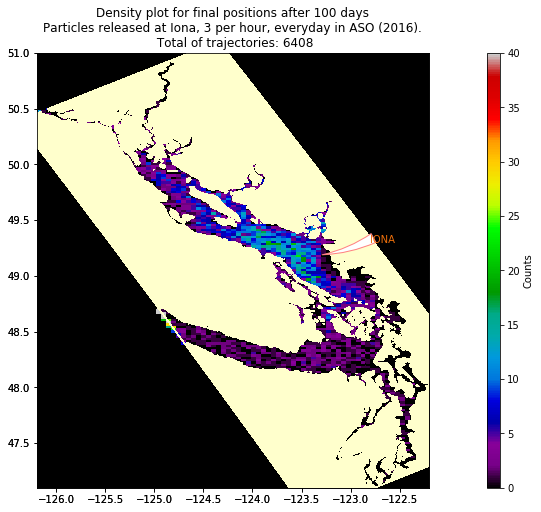

In [14]:

points = np.array(summer) #back to original name. convert to np.array

season = 'ASO'
title = (
    "Density plot for final positions after {} days\n"
    "Particles released at Iona, 3 per hour, everyday in {} (2016).".format(nday, season)
)

picname = "/ocean/gsgarbi/analysis-giorgio/2017apr20_presentation/{}d_{}".format(nday, season)

plot (points, title, picname)



start:  2017-04-21 12:16:38.602883


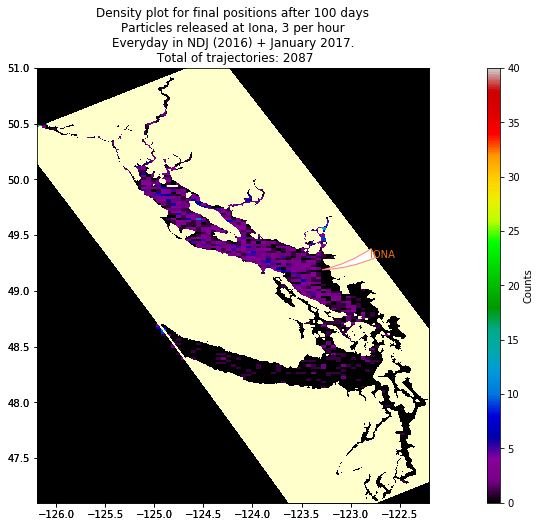

In [15]:
points = np.array(fall) #back to original name. convert to np.array

season = 'NDJ'
title = (
    "Density plot for final positions after {} days\n"
    "Particles released at Iona, 3 per hour\n"
    "Everyday in {} (2016) + January 2017.".format(nday, season)
)

picname = "/ocean/gsgarbi/analysis-giorgio/2017apr20_presentation/{}d_{}".format(nday, season)

plot (points, title, picname)
